#1.Data Collection

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [43]:
df = pd.read_excel('online_retail_II.xlsx')

In [44]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [45]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [46]:
df.shape

(525461, 8)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [48]:
df.dtypes

,0
Invoice,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
Price,float64
Customer ID,float64
Country,object


In [49]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [50]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


#2.Exploratory Data Analysis

In [52]:
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [61]:
df['Invoice'] = df['Invoice'].astype("str")
df['Invoice'].str.replace("[0-9]","",regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [62]:
df[df['Invoice'].str.startswith('A')].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [71]:
df[
    (~df['StockCode'].str.match(r"^\d{5}$", na=True)) &
    (~df['StockCode'].str.match(r"^\d{5}[a-zA-Z]+$", na=True))
]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [74]:
df[df['StockCode'].str.contains(r"^DOT", na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


#3.Data Cleaning

In [75]:
cleaned_df = df.copy()

In [80]:
cleaned_df['Invoice'] = cleaned_df['Invoice'].astype("str")

mask = (cleaned_df['Invoice'].str.match("^\\d{6}$")==True)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [84]:
cleaned_df.loc[:, 'StockCode'] = cleaned_df['StockCode'].astype(str)

mask = ((cleaned_df['StockCode'].str.match(r"^\d{5}$"))|
        (cleaned_df['StockCode'].str.match(r"^\d{5}[a-zA-Z]+$"))|
        (cleaned_df['StockCode'].str.match(r"^PADS$")))

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [86]:
cleaned_df.dropna(subset=['Customer ID'],inplace=True)

In [89]:
len(cleaned_df[cleaned_df['Price']==0])

28

In [90]:
cleaned_df= cleaned_df[cleaned_df['Price']!=0]

In [93]:
#23% percent of the records we dropped
len(cleaned_df)/len(df)

0.7732429238325965

#4.Feature Engineering

In [98]:
cleaned_df.loc[:, "SalesLineTotal"] = cleaned_df['Quantity'] * cleaned_df['Price']
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [101]:
aggregated_df = cleaned_df.groupby(by='Customer ID', as_index = False) \
    .agg(
        MonetaryValue=('SalesLineTotal', 'sum'),
        Frequency=('Invoice', 'count'),
        LastInvoiceDate=('InvoiceDate', 'max')
    )

aggregated_df.head()


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,169.36,24,2010-06-28 13:53:00
1,12347.0,1323.32,71,2010-12-07 14:57:00
2,12348.0,221.16,19,2010-09-27 14:59:00
3,12349.0,2221.14,100,2010-10-28 08:23:00
4,12351.0,300.93,21,2010-11-29 15:23:00


In [103]:
max_invoice_date = cleaned_df['InvoiceDate'].max()

aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days

aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,169.36,24,2010-06-28 13:53:00,164
1,12347.0,1323.32,71,2010-12-07 14:57:00,2
2,12348.0,221.16,19,2010-09-27 14:59:00,73
3,12349.0,2221.14,100,2010-10-28 08:23:00,42
4,12351.0,300.93,21,2010-11-29 15:23:00,10


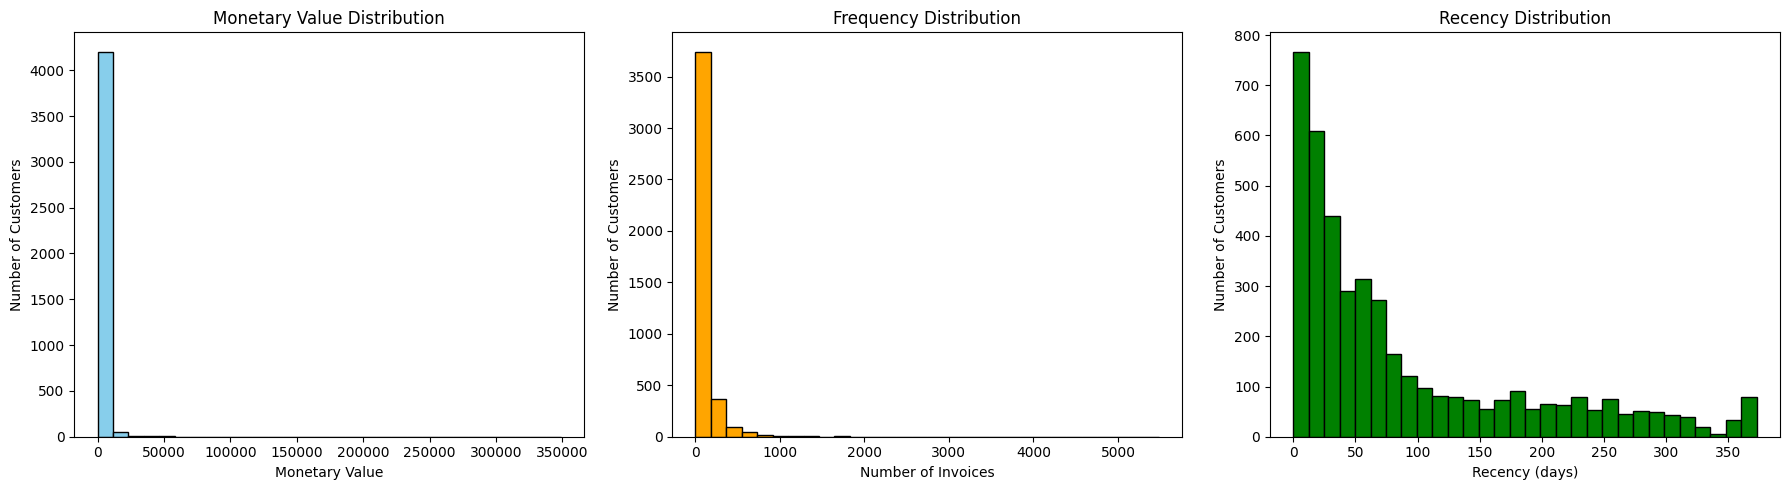

In [104]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(aggregated_df['MonetaryValue'], bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Monetary Value Distribution')
axes[0].set_xlabel('Monetary Value')
axes[0].set_ylabel('Number of Customers')

axes[1].hist(aggregated_df['Frequency'], bins=30, color='orange', edgecolor='black')
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Number of Invoices')
axes[1].set_ylabel('Number of Customers')

axes[2].hist(aggregated_df['Recency'], bins=30, color='green', edgecolor='black')
axes[2].set_title('Recency Distribution')
axes[2].set_xlabel('Recency (days)')
axes[2].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

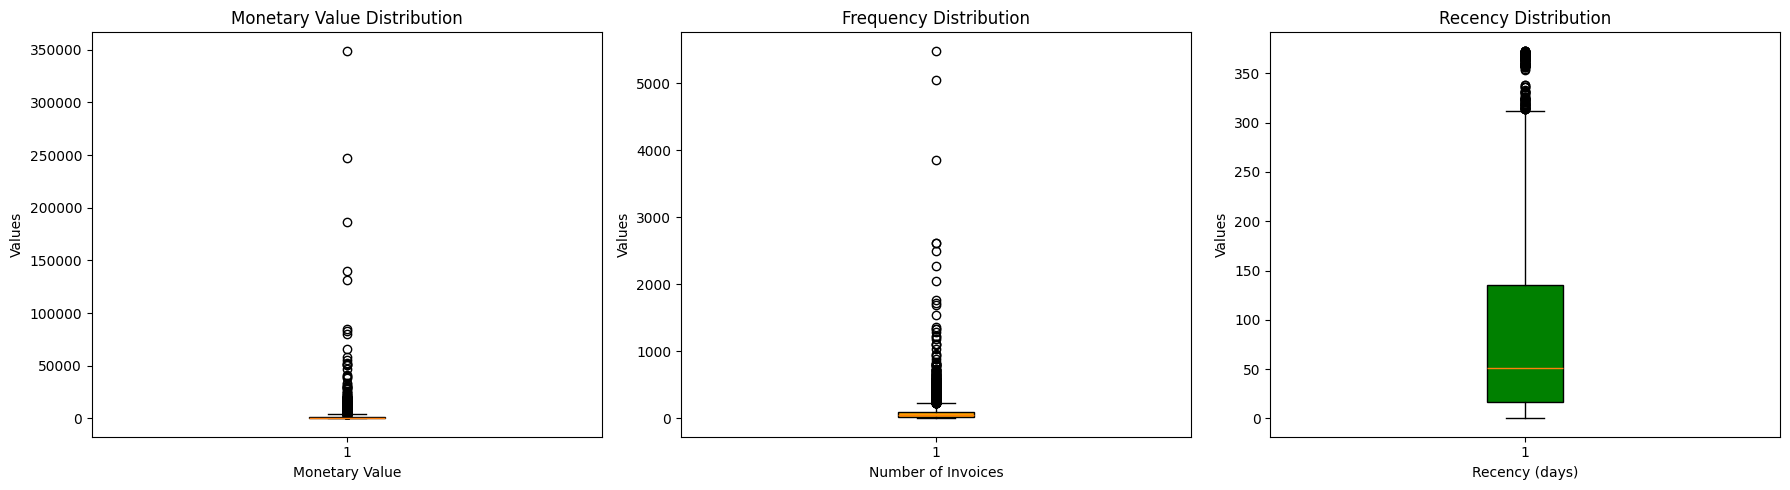

In [109]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].boxplot(aggregated_df['MonetaryValue'], patch_artist=True,
                boxprops=dict(facecolor='skyblue'))
axes[0].set_title('Monetary Value Distribution')
axes[0].set_xlabel('Monetary Value')
axes[0].set_ylabel('Values')

axes[1].boxplot(aggregated_df['Frequency'], patch_artist=True,
                boxprops=dict(facecolor='orange'))
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Number of Invoices')
axes[1].set_ylabel('Values')

axes[2].boxplot(aggregated_df['Recency'], patch_artist=True,
                boxprops=dict(facecolor='green'))
axes[2].set_title('Recency Distribution')
axes[2].set_xlabel('Recency (days)')
axes[2].set_ylabel('Values')

plt.tight_layout()
plt.show()

In [112]:
M_Q1 = aggregated_df['MonetaryValue'].quantile(0.25)
M_Q3 = aggregated_df['MonetaryValue'].quantile(0.75)

M_IQR = M_Q3 - M_Q1

monetary_outlier_df = aggregated_df[
    (aggregated_df['MonetaryValue'] < (M_Q1 - 1.5 * M_IQR)) |
    (aggregated_df['MonetaryValue'] > (M_Q3 + 1.5 * M_IQR))
]

monetary_outlier_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.000000,423.000000,423.000000,423,423.000000
mean,15103.040189,12188.101740,376.877069,2010-11-09 12:26:02.978723328,30.035461
min,12357.000000,3802.040000,7.000000,2009-12-10 18:03:00,0.000000
25%,13622.000000,4605.940000,143.000000,2010-11-08 13:17:30,3.000000
50%,14961.000000,6191.320000,237.000000,2010-11-26 12:19:00,13.000000
75%,16692.000000,10273.235000,435.500000,2010-12-06 10:34:30,31.000000
max,18260.000000,349164.350000,5485.000000,2010-12-09 19:32:00,364.000000
std,1728.661406,25830.851045,522.448446,NaN,51.541004


In [114]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)

F_IQR = F_Q3 - F_Q1

frequency_outlier_df = aggregated_df[
    (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR)) |
    (aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR))
]

frequency_outlier_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,384.000000,384.000000,384.000000,384,384.000000
mean,15433.622396,9763.149388,482.833333,2010-11-14 23:32:44.375000064,24.591146
min,12433.000000,698.450000,231.000000,2010-03-26 12:06:00,0.000000
25%,14037.750000,2486.197500,272.000000,2010-11-10 10:11:15,3.750000
50%,15525.000000,4302.550000,345.500000,2010-11-26 12:04:30,13.000000
75%,16828.750000,7426.405000,489.250000,2010-12-05 20:42:15,29.250000
max,18260.000000,349164.350000,5485.000000,2010-12-09 19:32:00,258.000000
std,1656.641377,26885.474133,510.292450,NaN,36.835419


In [119]:
R_Q1 = aggregated_df['Recency'].quantile(0.25)
R_Q3 = aggregated_df['Recency'].quantile(0.75)

R_IQR = R_Q3 - R_Q1

recency_outlier_df = aggregated_df[
    (
        (aggregated_df['Recency'] < (R_Q1 - 1.5 * R_IQR)) |
        (aggregated_df['Recency'] > (R_Q3 + 1.5 * R_IQR))
    ) ]

recency_outlier_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,167.000000,167.000000,167.000000,167,167.000000
mean,15429.029940,418.318868,22.293413,2009-12-23 13:52:27.664670720,350.970060
min,12439.000000,2.950000,1.000000,2009-12-01 10:49:00,314.000000
25%,14115.500000,147.350000,9.000000,2009-12-07 13:03:00,328.500000
50%,15413.000000,231.900000,16.000000,2009-12-14 15:07:00,360.000000
75%,16812.000000,356.175000,29.000000,2010-01-14 23:56:00,367.000000
max,18201.000000,9471.500000,154.000000,2010-01-29 14:22:00,373.000000
std,1629.838337,950.151329,20.940050,NaN,20.513124


In [120]:
non_outliers_df = aggregated_df[(~aggregated_df.isin(monetary_outlier_df)) & (~aggregated_df.isin(frequency_outlier_df)) & (~aggregated_df.isin(recency_outlier_df))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3533.000000,3533.000000,3533.000000,3533,3533.000000
mean,15363.144919,877.228717,53.871497,2010-09-13 11:01:46.379847168,87.091707
min,12346.000000,1.550000,1.000000,2010-01-31 12:19:00,0.000000
25%,13877.000000,285.900000,17.000000,2010-07-28 10:48:00,22.000000
50%,15368.000000,593.470000,38.000000,2010-10-14 14:04:00,56.000000
75%,16859.000000,1240.250000,76.000000,2010-11-17 15:47:00,134.000000
max,18287.000000,3788.210000,230.000000,2010-12-09 20:01:00,312.000000
std,1704.327837,803.399319,49.350790,NaN,84.104045


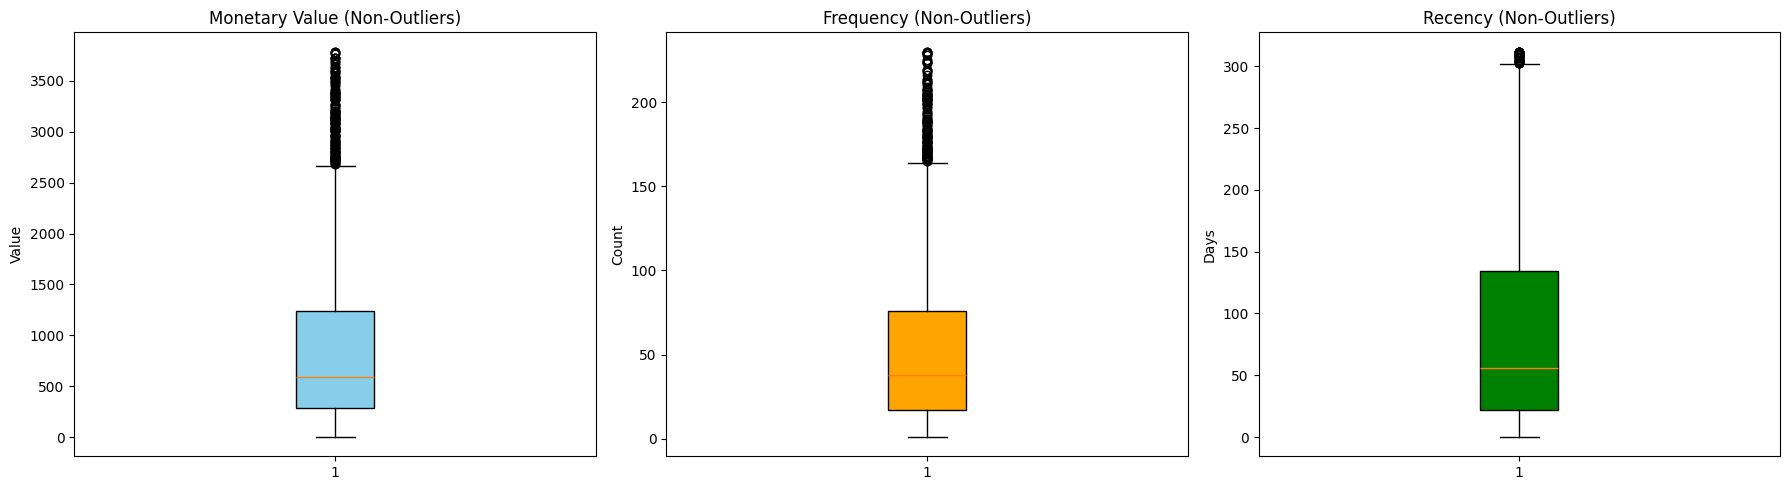

In [121]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].boxplot(non_outliers_df['MonetaryValue'].dropna(), patch_artist=True,
                boxprops=dict(facecolor='skyblue'))
axes[0].set_title('Monetary Value (Non-Outliers)')
axes[0].set_ylabel('Value')

axes[1].boxplot(non_outliers_df['Frequency'].dropna(), patch_artist=True,
                boxprops=dict(facecolor='orange'))
axes[1].set_title('Frequency (Non-Outliers)')
axes[1].set_ylabel('Count')

axes[2].boxplot(non_outliers_df['Recency'].dropna(), patch_artist=True,
                boxprops=dict(facecolor='green'))
axes[2].set_title('Recency (Non-Outliers)')
axes[2].set_ylabel('Days')

plt.tight_layout()
plt.show()

In [129]:
features_to_scale = ['MonetaryValue', 'Frequency', 'Recency']

scaler = StandardScaler()
scaled_values = scaler.fit_transform(non_outliers_df[features_to_scale])

scaled_df = pd.DataFrame(scaled_values, columns=features_to_scale, index=non_outliers_df.index)

scaled_df = scaled_df.dropna()

scaled_df.head()

,MonetaryValue,Frequency,Recency
0,-0.881217,-0.605375,0.914572
1,0.555333,0.347126,-1.011887
2,-0.816732,-0.706705,-0.167575
3,1.673018,0.934839,-0.536218
4,-0.717427,-0.666173,-0.916753


In [ ]:
non_outliers_df = non_outliers_df.dropna()
non_outliers_df.shape

#5.Model Building

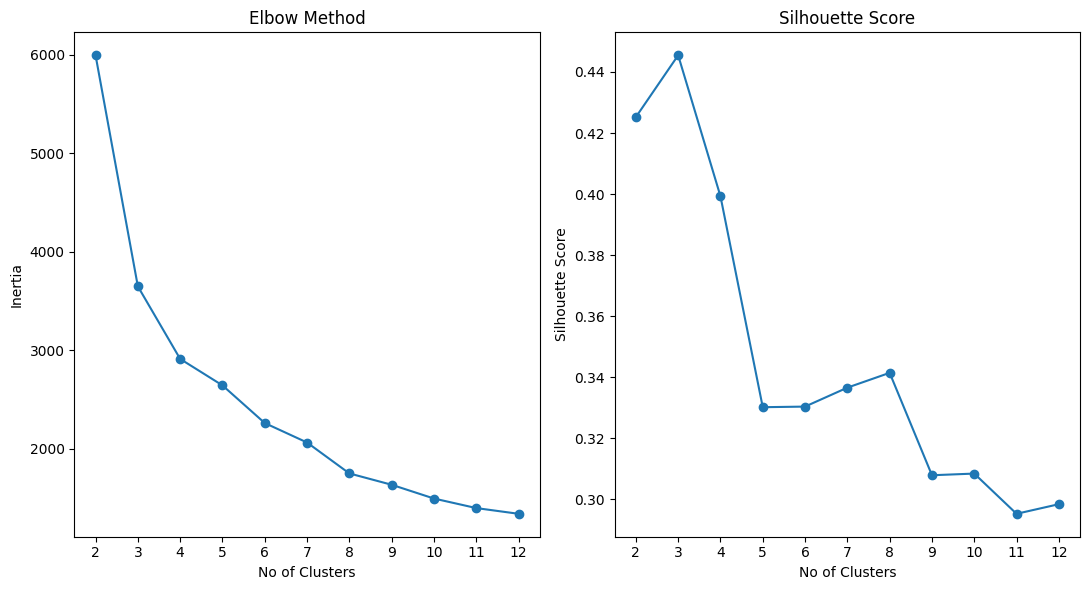

In [131]:
max_k = 12

inertia = []

silhouette_scores = []

k_values = range(2,max_k+1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    kmeans.fit_predict(scaled_df)

    sil_score = silhouette_score(scaled_df, kmeans.labels_)

    silhouette_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(11,6))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_values)

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('No of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)

plt.tight_layout()
plt.show()

In [132]:
Kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = Kmeans.fit_predict(scaled_df)

cluster_labels

array([2, 1, 0, ..., 2, 1, 3], dtype=int32)

In [144]:
non_outliers_df['Cluster'] = cluster_labels

non_outliers_df

<ipython-input-144-1791966522>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Cluster'] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,169.36,24.0,2010-06-28 13:53:00,164.0,2
1,12347.0,1323.32,71.0,2010-12-07 14:57:00,2.0,1
2,12348.0,221.16,19.0,2010-09-27 14:59:00,73.0,0
3,12349.0,2221.14,100.0,2010-10-28 08:23:00,42.0,3
4,12351.0,300.93,21.0,2010-11-29 15:23:00,10.0,0
...,...,...,...,...,...,...
4280,18283.0,641.77,230.0,2010-11-22 15:30:00,17.0,3
4281,18284.0,411.68,27.0,2010-10-04 11:33:00,66.0,0
4282,18285.0,377.00,11.0,2010-02-17 10:24:00,295.0,2
4283,18286.0,1246.43,66.0,2010-08-20 11:57:00,111.0,1


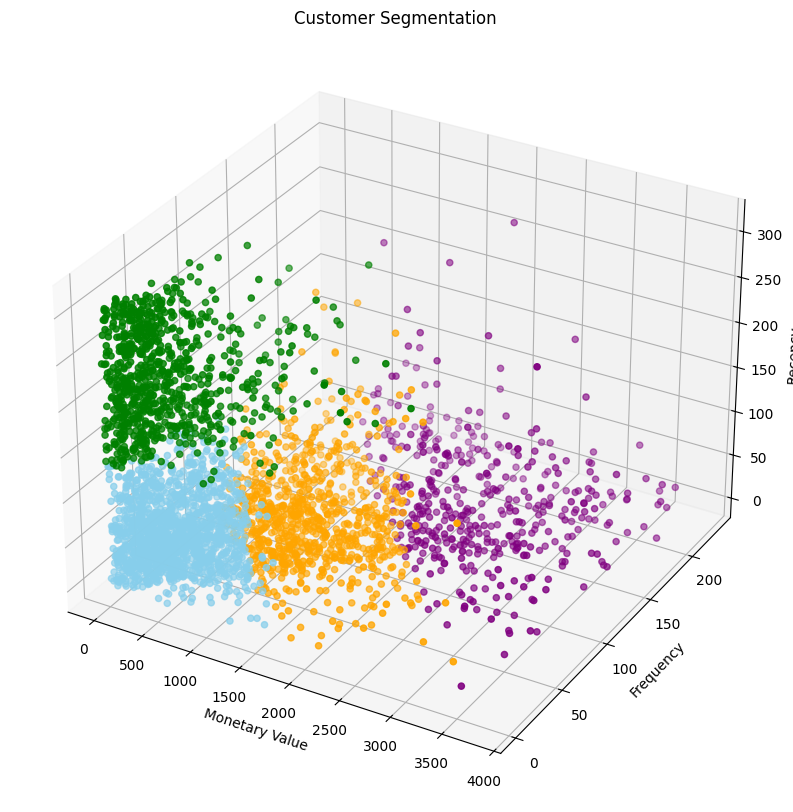

In [147]:
cluster_colors = {
    0: 'skyblue',
    1: 'orange',
    2: 'green',
    3: 'purple'
}

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(non_outliers_df['MonetaryValue'], non_outliers_df['Frequency'], non_outliers_df['Recency'], c=colors, marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

plt.title('Customer Segmentation')

plt.show()

<ipython-input-152-3329638001>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y='MonetaryValue', data=non_outliers_df, palette=cluster_colors)
<ipython-input-152-3329638001>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y='Frequency', data=non_outliers_df, palette=cluster_colors)
<ipython-input-152-3329638001>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y='Recency', data=non_outliers_df, palette=cluster_colors)


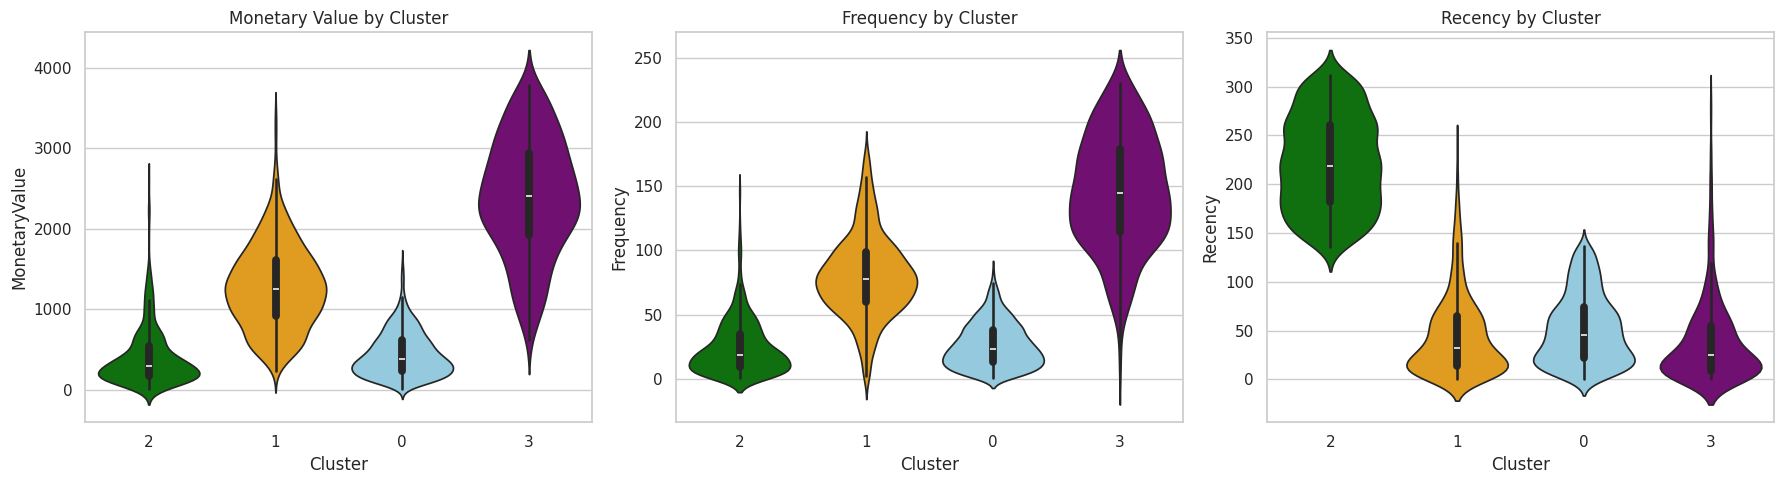

In [152]:
cluster_colors = {
    '0': 'skyblue',
    '1': 'orange',
    '2': 'green',
    '3': 'purple'
}

non_outliers_df['Cluster'] = non_outliers_df['Cluster'].astype(str)

sns.set(style="whitegrid")

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.violinplot(x='Cluster', y='MonetaryValue', data=non_outliers_df, palette=cluster_colors)
plt.title('Monetary Value by Cluster')

plt.subplot(1, 3, 2)
sns.violinplot(x='Cluster', y='Frequency', data=non_outliers_df, palette=cluster_colors)
plt.title('Frequency by Cluster')

plt.subplot(1, 3, 3)
sns.violinplot(x='Cluster', y='Recency', data=non_outliers_df, palette=cluster_colors)
plt.title('Recency by Cluster')

plt.tight_layout()
plt.show()


### ✅ Cluster 0 (Skyblue)

**Observation:**
- Low MonetaryValue (low-spending customers)
- Low Frequency (rare purchases)
- Moderate Recency (recent but not very recent)

**Rationale:**
These customers are not highly valuable. They visit occasionally and spend small amounts.

**Action:**
- Run retargeting campaigns with small discounts or product bundles.
- Send personalized recommendations to increase engagement and order value.

---

### ✅ Cluster 1 (Orange)

**Observation:**
- Moderate-High MonetaryValue
- Moderate-High Frequency
- Low Recency (very recent customers)

**Rationale:**
These are active and valuable customers. They buy often and recently.

**Action:**
- Consider them as potential loyalists.
- Launch loyalty programs or early access to offers.
- Ask for reviews or referrals.

---

### ✅ Cluster 2 (Green)

**Observation:**
- Low MonetaryValue
- Low Frequency
- High Recency (long time since last interaction)

**Rationale:**
These are likely churned or dormant customers who rarely engaged and haven’t returned in a long time.

**Action:**
- Initiate reactivation campaigns.
- Offer strong incentives (e.g., “We miss you” emails, major discounts).
- Use win-back strategies.

---

### ✅ Cluster 3 (Purple)

**Observation:**
- High MonetaryValue
- High Frequency
- Low Recency (very recent)

**Rationale:**
These are your best customers – high spenders, frequent buyers, and very recent.

**Action:**
- Tag as VIP customers.
- Prioritize with exclusive offers, priority support, or beta product access.
- Maintain high engagement to retain them.


#6.Visualization

<ipython-input-156-3873998586>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


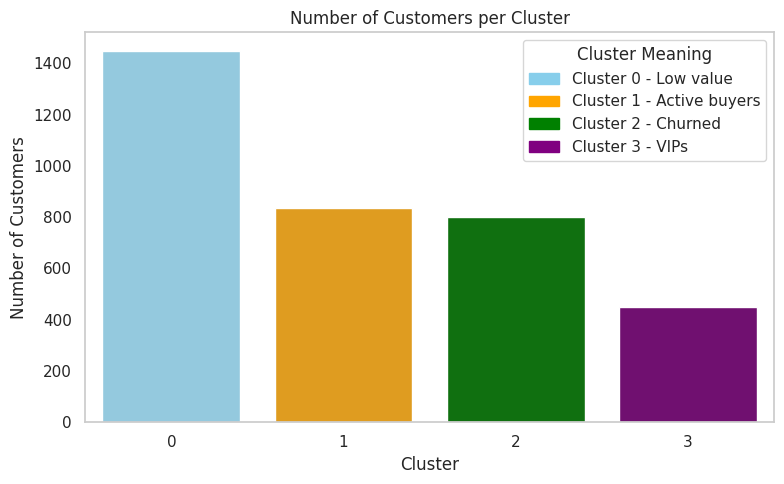

In [156]:
cluster_colors = {
    '0': 'skyblue',
    '1': 'orange',
    '2': 'green',
    '3': 'purple'
}

cluster_counts = non_outliers_df['Cluster'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=cluster_counts.index,
    y=cluster_counts.values,
    palette=[cluster_colors[str(c)] for c in cluster_counts.index]
)

plt.title('Number of Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')

legend_labels = [
    Patch(color=cluster_colors['0'], label='Cluster 0 - Low value'),
    Patch(color=cluster_colors['1'], label='Cluster 1 - Active buyers'),
    Patch(color=cluster_colors['2'], label='Cluster 2 - Churned'),
    Patch(color=cluster_colors['3'], label='Cluster 3 - VIPs')
]
plt.legend(handles=legend_labels, title='Cluster Meaning', loc='upper right')

plt.tight_layout()
plt.show()